### 1. 주피터 세팅

In [ ]:

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

### 2. 파이썬 기본

In [ ]:
# 데이터프레임 정보 추출
df = pd.read_csv(filepath, na_values='NA', encoding='utf8') # 데이터 가져오기
data.to_csv('result.csv', header=True, index=True, encoding='utf8') # 데이터 저장

students.dropna(thresh=2) # 행 별 데이터가 2개는 있어야함

iris.sort_index(axis=1, ascending=True, inplace=True) # axis=1 은 column 순서 정렬

df1.drop(['Outcome'],axis=1) # 특정 컬럼 drop

pd.qcut(iris['petal width (cm)'], q=3, labels=['short', 'middle', 'long']) # 3등분해서 라벨링

pd.crosstab(iris['petal width level'], iris['class']) # R에서 table과 같음. 교차테이블

score = {'학년':[1, 1, 1, 1, 2, 2], 
         '반':['A', 'A', 'B', 'B', 'C', 'C'], 
         '성별':['여자', '남자', '여자', '남자', '여자', '남자'],
         '성적': [76, 88, 85, 72, 68, 70]}
score.pivot_table(index=['학년', '반'], columns='성별', values='성적')
score.reset_index().melt(id_vars=['학년','반'], var_name='성별', value_name='성적')

landmark['location'].str.split(" ", expand=True) # expand 안하면 column이 안나뉨
landmark['location'].str.split(" ").str[0] # 행별 첫번째 요소 출력

### 3. 시각화

In [ ]:
# 기본적인 설정
plt.title('title')
plt.ylabel('ylabel')
plt.xlabel('xlabel')
plt.clf() # 초기화.. 파이참에서
plt.legend(iris2.Class.unique())

# 막대 그래프
plt.bar(wine_type.index, wine_type.values,               # 데이터의 x, 높이
        width = 0.8, bottom = None,        # 막대의 넓이와 막대 밑면의 y좌표
        align = 'edge')
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None, align = 'edge')

# 박스 플롯
iris.drop(columns='Class').plot(kind='box') # pandas Dataframe 메서드
iris.drop(columns='Class').boxplot()
iris[['sepal width (cm)', 'Class']].boxplot(by='Class') # pandas Dataframe 메서드
plt.boxplot(iris['sepal width (cm)'], whis=1.5)
sns.boxplot(x="Class", y="sepal width (cm)", data=iris)

# scatter
plt.scatter(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='Class', style='Class')

# 직선 긋기
plt.hlines(6, -10, 10, color='red') # y = 6, x = [-10, 10]
plt.vlines(-6, -10, 10, linestyles='solid') # x = 6, y = [-10, 10]

# poly fitting
b2, b1, b0 = np.polyfit(X, Y, 2) # 2차 방정식
plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b0 + b1*X + b2*X**2, color='red')

# sns 카테고리별 plot
sns.lineplot(iris, x= 'sepal length (cm)', y = 'petal width (cm)', hue='class')

# pairplot
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha = 0.5, figsize = (8, 8), diagonal = 'kde') # 대각선엔 kernal density estimate
sns.pairplot(iris, diag_kind = 'auto', hue = 'Class')

# heatmap(상관행렬 그래프)
iris_corr = iris.drop(columns='Class').corr(method='pearson')
sns.heatmap(iris_corr, xticklabels = iris_corr.columns, yticklabels = iris_corr.columns, cmap = 'RdBu_r', annot = True)


sns.countplot(x='diagnosis', data =breast)
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)

# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=Iris_data)

# subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
fig.tight_layout()
for i in range(4):
    sns.barplot(x=diabetes.index, y=diabetes.iloc[:,i], ax = axes[0][i] )
    axes[0][i].set_title(diabetes.columns[i])
for i in range(4):
    sns.barplot(x=diabetes.index, y=diabetes.iloc[:,i+4], ax = axes[1][i])
    axes[1][i].set_title(diabetes.columns[i+4])

plt.suptitle("EDA")
plt.show()
# subplot2
plt.subplot(2,2,1) # matlab처럼 subplot 이후에 코드 작성

### 4. 데이터 전처리

In [ ]:
from sklearn.impute import KNNImputer
df[df.isna().any(axis=1)] # 결측치가 있는 행만 확인
# 결측치가 있는 수치형 데이터만을 추출 
KNN_data = df.select_dtypes('number')
#모델링 
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns)

# 정규 변환 - 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.
from sklearn.preprocessing import StandardScaler 
StandardScaler().fit_transform(x)
StdScaler = StandardScaler()
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# MinMax 변환 - 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다. 역시 아웃라이어의 존재에 매우 민감하다.
from sklearn.preprocessing import MinMaxScaler
# MaxAbs 변환 - 절대값이 0~1사이에 매핑되도록 한다. 즉 -1~1 사이로 재조정한다. 양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.
from sklearn.preprocessing import MaxAbsScaler
# RobustScaler 변환 - 아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.
from sklearn.preprocessing import RobustScaler

# 시각화 등 확인하려면 역변환을 해주는게 좋다
RuScaler.inverse_transform(X_train_sc)


# PCA 수행
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(x) # pca 할 때는 정규변환 하는게 좋음
pca = PCA( n_components = 4) 
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

pca = PCA(n_components = 2)                        # PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = pca.fit_transform(x)     # 2개의 주성분을 가진 데이터로 변환
principal_iris = pd.DataFrame(data = principalComponents, columns =['pc1', 'pc2']) 
principal_iris.head()


# 불균형 데이터 처리
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# 1:1 언더샘플링
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
# 2:1 언더샘플링
undersample = RandomUnderSampler(sampling_strategy=0.5) 
x_under2, y_under2 = undersample.fit_resample(x, y) # Counter({0: 200, 1: 100})
# 2:1 오버샘플링
oversample = RandomOverSampler(sampling_strategy=0.5)  
x_over, y_over = oversample.fit_resample(x, y) # Counter({0: 1900, 1: 950})
# 1:1 SMOTE 오버샘플링
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)

**undersample - oversample 선택 및 이유**  
현 데이터가 총 768개로 적은 데이터가 존재한다.. 따라서, undersampling을 선택하게 되면 데이터가 더 적어지기 때문에 오버피팅이 일어날 위험이 더 크다. oversampling을 선택할 것 이다.  

**결과**  
데이터 수가 적기 때문에 hold-out 기법이 아니라 cross-validation 기법으로 성능을 확인하였고, 위에서 말했던거와 같이 oversampling 기법인 smote를 활용하였다.
따라서, 역시나 logistic이 가장 빨랐으며 svm이 성능이 가장 좋은것을 확인할수있었다.

**pca 적용 결과**  
예측 성능은 다소 상승되었고 속도 측면에도 차원축소에 의해 더 빨라졌다.
향후에 데이터가 크게 늘어난다면 성능 및 속도 측면에서 더 유의미한 차이가 클 것으로 보인다.

### 5. 머신러닝 프로세스

In [ ]:
# 회귀분석 성능
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
# 분류분석 성능
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# FPR, TPR, 임곗값 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
plt.plot(fpr, tpr)
auc = auc(fpr, tpr)

# 회귀 분석
from sklearn.linear_model import LinearRegression
print('MAE: {0: .5f}'.format(mae))  # 5번째 자리까지 표현
# 분류 분석
from sklearn.tree import DecisionTreeClassifier # 파라미터: max_depth

# 교차 검증
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4)

# KFold 
# 5개의 경우의 수로 분할하여 검증 
kfold = KFold()
def model_result(model):
    pred_li =[]
    for train_index,test_index in kfold.split(X):
        X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train,y_test = y.iloc[train_index,:],y.iloc[test_index,:]
        
        X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)
        
        start = time.time()
        model.fit(X_train_resample,y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test)
        pred_li.append(accuracy_score(pred,y_test['Outcome']))
        
    ## 마지막 데이터 학습 속도     
    print(f"{end - start:.5f} sec")
    ## 5개의 train데이터에 대한 정확도의 평균 값  
    print(np.mean(pred_li))

### 6-1. 선형회귀

In [ ]:
# 선형회귀하려면 series는 안되나? numpy만 되나?
lr = LinearRegression()
lr.fit(x,y)
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)
print(lr.score(x,y))

# Stochastic Gradient Descent 
from sklearn.linear_model import SGDRegressor
sgd_reg =SGDRegressor(max_iter=1000)
sgd_reg.fit(x,y.ravel())

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1))
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

## R2 
print("선형회귀 결정계수 : ", reg.score(X_test,y_test))
print("선형회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)
np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))


## 다중 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
# 릿지 회귀
alpha = np.logspace(-3, 1, 5)

ridge = Ridge(normalize=True) 
param_grid = {'alpha':alpha}
ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train,y_train)

print(ridge_model.best_params_)
print("릿지회귀 결정계수 : ", ridge_model.score(X_test,y_test))
print("릿지회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))
# 라쏘 회귀
lasso = Lasso(normalize=True) 
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train,y_train)

print(lasso_model.best_params_)
print("라쏘회귀 결정계수 : ", lasso_model.best_estimator_.score(X_test,y_test))
print("라쏘회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lasso_model.best_estimator_.predict(X_test))))

### 6-2. 분류, 회귀 분석

In [ ]:
# svm
from sklearn.svm import SVC # C=0.5
from sklearn.svm import LinearSVC
LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

# KNN 분류
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=15, weights='uniform')

from sklearn.neighbors import KNeighborsRegressor
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

# Decision Tree 분류, 회귀
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeClassifier(max_depth =5)

# feature importances
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

# Bagging 분류, 회귀
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator =DecisionTreeClassifier(), oob_score=True) # 차후 버전에서는 base_estimator -> estimator                         
oob=clfb.fit(X, y).oob_score_  # out of bag
print(oob)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator =DecisionTreeRegressor(), oob_score=True)
reg=reg.fit(X, y)
reg.oob_score_

# Adaboost 분류
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator =None)
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

# 랜포 분류, 호귀
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators =100, min_samples_split =5)
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
gnb.predict_proba(x_test)[[0 , 13 , 68 ]]  # 0 13 68 이 머지?
gnb.predict(x_test)[[0 , 13 , 68 ]]



### 7-1. 회귀 분석

In [ ]:
# 회귀 분석
from statsmodels.formula import api
from statsmodels import regression
from scipy import stats
import pylab

fit = api.ols('y ~ x1 + x2', data = dat).fit()
y_pred = fit.predict(X)
print(fit.summary())

plt.subplot(2,2,1)
slope, intercept = np.polyfit(heigth, weight, 1)
abline_values = [slope * i + intercept for i in heigth]
plt.plot(height, weight, 'o')
plt.plot(height, abline_values, 'b')
plt.title('키(height) 선 적합도')
plt.xlabel('height'); plt.ylabel('weight'); plt.tight_layout()

plt.subplot(2,2,2)
r = regression.linear_model.RegressionResults.resid(fit)
plt.plot(height, r, 'o')
plt.title('키(height) 선 잔차도')
plt.xlabel('height'); plt.ylabel('weight'); plt.tight_layout()

plt.subplot(2,2,3)
stats.probplot(r, dist = 'norm', plot = pylab)
plt.title('잔차 정규 확률도')
plt.xlabel('THeoretical Quantiles'); plt.ylabel('Sample Quantiles'); plt.tight_layout()


# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1,len(X.columns)): 
    vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])
pd.DataFrame(vif_list,columns=['vif','variable'])




In [ ]:
# 전진, 후진, 단계적 소거법
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,
                                     feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model

# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])

Stepwise_best_model = Stepwise_model(X=X, y=y)

### 7-2. t-test

In [ ]:
# 정규성 테스트
import scipy.stats as stats
from scipy.stats import shapiro
mu =2.6
shapiro(cats['Bwt']) # 귀무가설: 정규분포이다
# 모양 확인
# 정규분포 일 떄
stats.ttest_1samp(cats.Bwt, popmean=mu)
# 정규분포가 아닐 때
stats.wilcoxon(cats.Bwt - mu , alternative='two-sided') # 양측 검정

# 대응 표본 ttest
stats.ttest_rel(data['after'],data['before'],alternative='greater')

## 독립 표본 ttest
# 등분산 테스트
stats.levene(female, male)
# 등분산이면 Student's t-test, 아니면 Welch's t-test
stats.ttest_ind(female, male, equal_var=False) 

### 7-3. ANOVA, 일원배치 분산분석

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 

In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.factorplots import interaction_plot

# 정규성 테스트
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))
# 등분산 테스트
stats.levene(setosa,versicolor,virginica)

# ANOVA 분석, 일원배치 분산분석 (1)
stats.f_oneway(setosa,versicolor,virginica)
# ANOVA 분석, 일원배치 분산분석 (2) - 일반적인 방법
fit = ols('y ~ treat', data = data).fit()
sm.stats.anova_lm(fit)

# 사후 분석 1
posthoc = pairwise_tukeyhsd(df['점수'], df['성별'], alpha=0.05)
print(posthoc)

# 사후 분석 2 - 일반적인 방법
mc = MultiComparison(data= Iris_data["sepal width"], groups=Iris_data["target"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()
tuekeyhsd.summary()

# 크루스칼 왈리스 검정 
# 비모수적 방법이므로 데이터가 정규성을 만족하지 않을 때 f_oneway 대신 사용
stats.kruskal(setosa,versicolor,virginica)

# welch anova
# 그룹간 등분산을 가정하지 않고도 사용 가능
import pingouin as pg
pg.welch_anova(data = Iris_data, dv ='sepal width', between='target')


# 이원분산분석을 위한 ols 모델 작성
model = ols('점수 ~ C(성별) + C(학년) + C(성별):C(학년)', data=df).fit()
# 검증을 위한 anova_lm 모델 적합
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg"]
interaction_plot(cyl,am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)

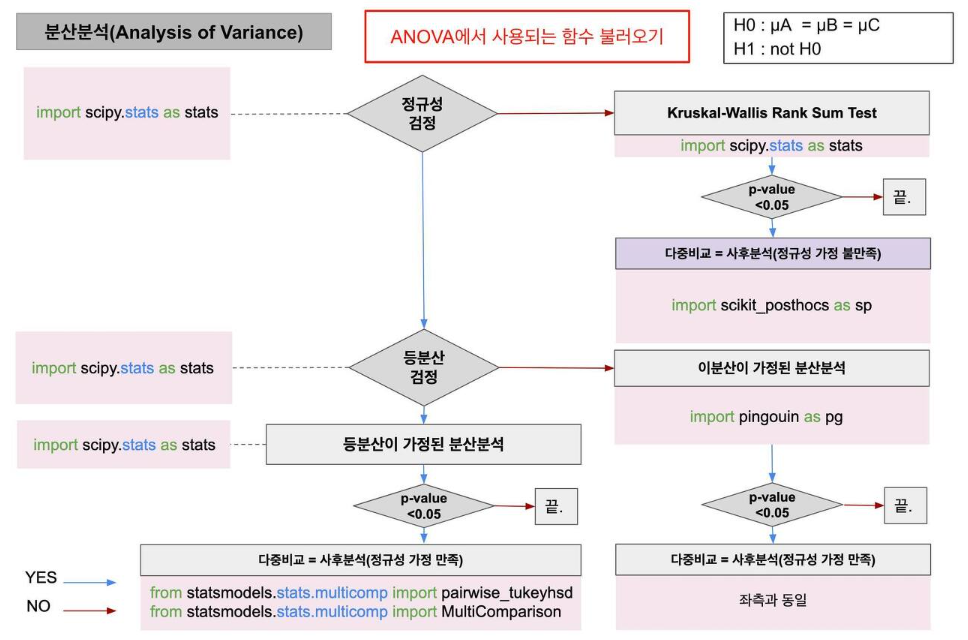

### 7-4. 적합도 검정, 독립성 검정, 동질성 검정

In [ ]:
# 적합도 검정
from scipy import stats
chi2, p = stats.chisquare(observed data, expected data)

# 독립성 검정
table = pd.crosstab(df['class'], df['survived'])
chi, p, dof, expect = stats.chi2_contingency(table)
print('Statistic:', chi)
print('p-value:', p)
print('df:', dof)
print('expect: \n', expect)

# 동질성 검정
statistic, p_value = stats.bartlett(group1, group2, group3)
print("등분산 검정 통계량:", statistic)
print("p-value:", p_value)

### 7-5. 군집 분석

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 최단연결법
single = linkage(US.iloc[:, 1::], metric ='euclidean', method='single')
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)
plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')

# Kmean 클러스터별 콜린스키 하라바츠 결과 비교
# 더 높은 콜린스키-하라바츠 지수는 더 나은 군집화를 나타냅니다.
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

# inertia로 클러스터 수 별 비교
# inertia : 군집 내 제곱 합(SSW, Within-Cluster Sum of Squares)
# 작을 수록 좋다.
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X)

# 어떤 군집에 설정되었는지 확인
assignments = km.labels_

# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster", 
             corner =True,  
             palette='bright')
plt.show()

### 7-6. 연관 분석

In [ ]:
from statsmodels.sandbox.stats.runs import runstest_1samp
#Perform Runs test
# - run-test의 귀무가설 : 연속적인 관측값이 임의적이다. 
# - run-test의 대립가설 : 연속적인 관측값이 임의적이 아니다
runstest_1samp(test_df['product'],cutoff =0.5 , correction=True)

from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary,columns = te.columns_)

## 지지도 60 % 이상인 품목만 추출 
apriori(df, min_support=0.6, use_colnames=True)

## 규칙의 길이를 추출하는 방법 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


### 7-7. 시계열

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# datetime 컬럼을 index로 설정해야함
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

# 귀무가설(H0): 시계열 데이터는 단위근을 가지고 있어서, 비정상(non-stationary)하다.
# 대립가설(H1): 시계열 데이터는 단위근을 가지고 있지 않아서, 정상성(stationary)을 가지고 있다.
# 단위근을 가진 시계열 데이터는 정상성을 갖지 않으며, 시계열 분석에서 주기적인 패턴이나 추세를 제거하여 정상성을 만족시키는 전처리 과정이 필요합니다.
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))


plot_acf(diff_data) #AR(p)의 값 확인 가능
plot_pacf(diff_data) #MA(q)의 값 확인 가능

model = ARIMA(training, order=(2,1,2))
res = model.fit()
res.summary()

plt.plot(res.predict())
plt.plot(training)

forecast_data = res.forecast(steps=len(test), alpha=0.05) 
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.

print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : " , RMSE)

## 8. 문제 풀이 방향

1. 시각화 포함 EDA
    - DataFrame.info() 함수를 통해 데이터 타입 및 결측치 확인
    - 종속변수(수치형 데이터) - 정규분포인지 여부
       - value_counts -> plt.bar, plt.hist
    - 종속변수(범주형 데이터) - groupby(종속변수).mean() -> bar
        - 불균형이 있다면 smote
    - 수치형 변수 시각화
        - DataFrame.corr() -> sns.heatmap
        - boxplot
    - 범주형 변수 시각화 - value_counts -> plt.bar
    - 결측치 존재 여부 -> 얼마나 존재하는지 언급, knn imputer
    - 데이터 타입 설명: 독립변수, 종속 변수 별 설명.. 독립변수 object 타입은 변환
    - 변수 간 상관관계 설명
       - 독립변수 간: 다중공선성 우려
       - 종속변수-독립변수 간: 상관성이 낮으면 파생변수 활용할 필요가 있음
    - pandas_profiling

2. 데이터 전처리
   - 결측치 처리: 한 행이 전부 결측치인 경우는 존재하지 않으므로 삭제보다는 대체하는 것이 좋아보인다. 수치형 변수만 결측치가 있으므로 KNN기법을 사용하여 대체
   - 이산형 변수: boolean 타입으로 변경 -> 원핫인코딩 - pd.get_dummies
     
3. 머신러닝 알고리즘 선택 및 특징 기술
   - svm, xgboost, randomforest 특징
       - 회귀분석과 분류분석 모두 할 수 있는 분석 알고리즘
       - 과대과소적합을 막기 위해 매개변수 설정이 필요 
   - 한계점 : G1,G2가 grade와의 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때에는 정확도가 매우 낮게 나온다. 성적과 밀접 관련이 있는 추가적인 변수를 추가한다면, 모델의 정확성 뿐만이 아니라 의미있는 분석이 될 것이라 생각한다.
  
   - another
       - 속도 측면에서 logisticregression,정확도 측면에서 svm, 기타로 xgboost를 제시한다

### 9. 기타 코드

In [ ]:
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [0.1, 1,10,100],'gamma': [0.001, 0.01, 0.1, 1, 10]}
]
grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [ ]:
rf_grid = [
    { 'max_depth': [2,4,6,8,10], 'min_samples_split': [2, 4, 6, 8, 10]}
]

rf  = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid =rf_grid, cv = 5)
rf.fit(X_train, y_train)

print(rf.best_params_)
print("R2 : ", rf.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))

In [ ]:
xgb_grid = [
    { 'max_depth': [2,4,6,8,10]}
]

xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid =xgb_grid, cv = 5)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

print("R2 : ", xgb.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

In [ ]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_)

In [ ]:
# 데이터 불균형 시각화
sns.countplot(x='is_canceled', data =hotel_nonull)

### 10. 문제 풀이

p관리도 : 전체품목의 표본에서 부적합 부품의 수의 비율  
p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오  
관리도 시각화 하시오

In [ ]:
data = {
    '생산수량': [587, 588, 455, 666, 750],
    '불량수량': [19, 15, 19, 12, 15]
}
df2["p"] = df2["불량수량"]/df2["생산수량"]
df2["UCL"] = df2["p"] + (3 * (df2["p"]* (1-df2["p"]) / df2["생산수량"])**0.5)
df2["LCL"] = df2["p"] - (3 * (df2["p"]* (1-df2["p"]) / df2["생산수량"])**0.5)

## 관리 중심선 : 전체 불량 비율 
CL = df2["불량수량"].sum() / df2["생산수량"].sum()
print("관리중심선 : " , CL )
df2